# Import Libraries

In [1]:
# Please install the necessary libraries before importing them
# For creating a virtual environment, do check the blog https://blog.quantinsti.com/set-up-python-system/
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import numpy as np

# Download Data

In [2]:
# Download historical stock data for Bitcoin (BTC-USD) from January 2, 2017, to October 25, 2024
# auto_adjust=True automatically adjusts the data for splits and dividends
df = yf.download('BTC-USD', '2017-01-02','2024-10-25', auto_adjust=True)

# Display the first few rows of the downloaded data to check the structure
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


<AxesSubplot:xlabel='Date'>

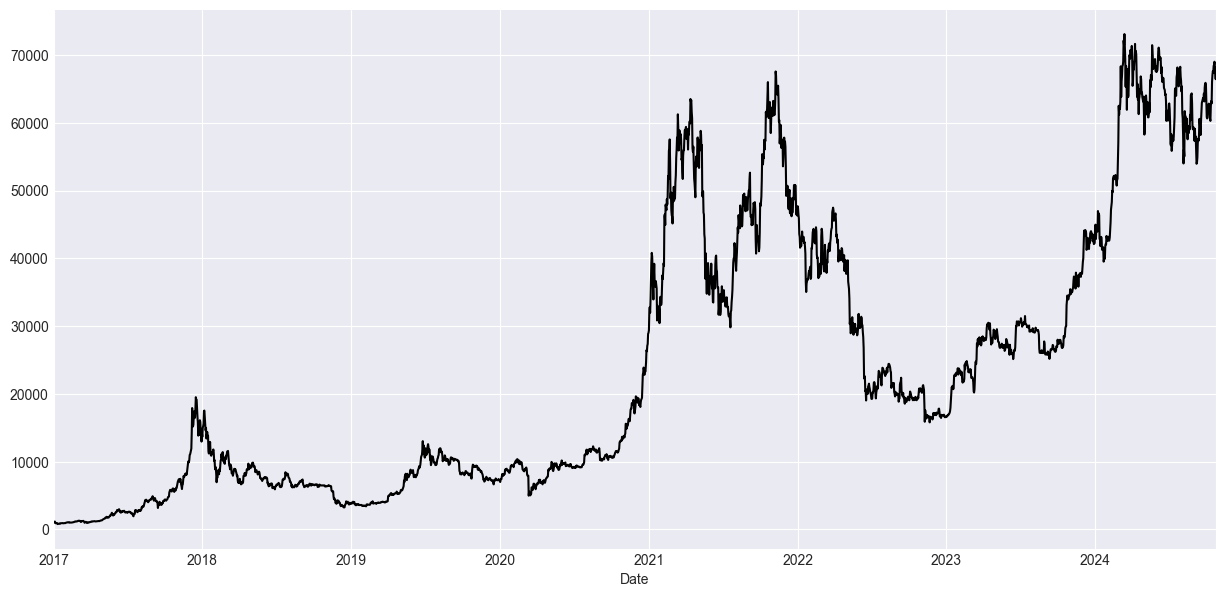

In [3]:
df['Close'].plot(figsize=(15, 7), color='black', label='Close Price')

# Calculate Simple Moving Average

In [4]:
# Calculate the simple moving average (SMA) for the 'Close' column in the 'reliance' DataFrame
# by taking the rolling mean over a window of 3 periods.
df['sma'] = df['Close'].rolling(3).mean()

# Display the last few rows of the 'reliance' DataFrame with the newly calculated SMA.
df.tail()

,Open,High,Low,Close,Volume,sma
Date,,,,,,
2024-10-20,68364.179688,69359.007812,68105.718750,69001.703125,18975847518,68594.408854
2024-10-21,69002.000000,69462.734375,66829.851562,67367.851562,37498611780,68244.096354
2024-10-22,67360.703125,67801.578125,66581.367188,67361.406250,31808472566,67910.320312
2024-10-23,67362.375000,67402.742188,65188.035156,66432.195312,32263980353,67053.817708
2024-10-24,66653.703125,68798.960938,66454.101562,68161.054688,31414428647,67318.218750


# Generate Buy and Sell Signal

<AxesSubplot:label='63dbedf8-36c0-4e07-b55c-362129460781'>

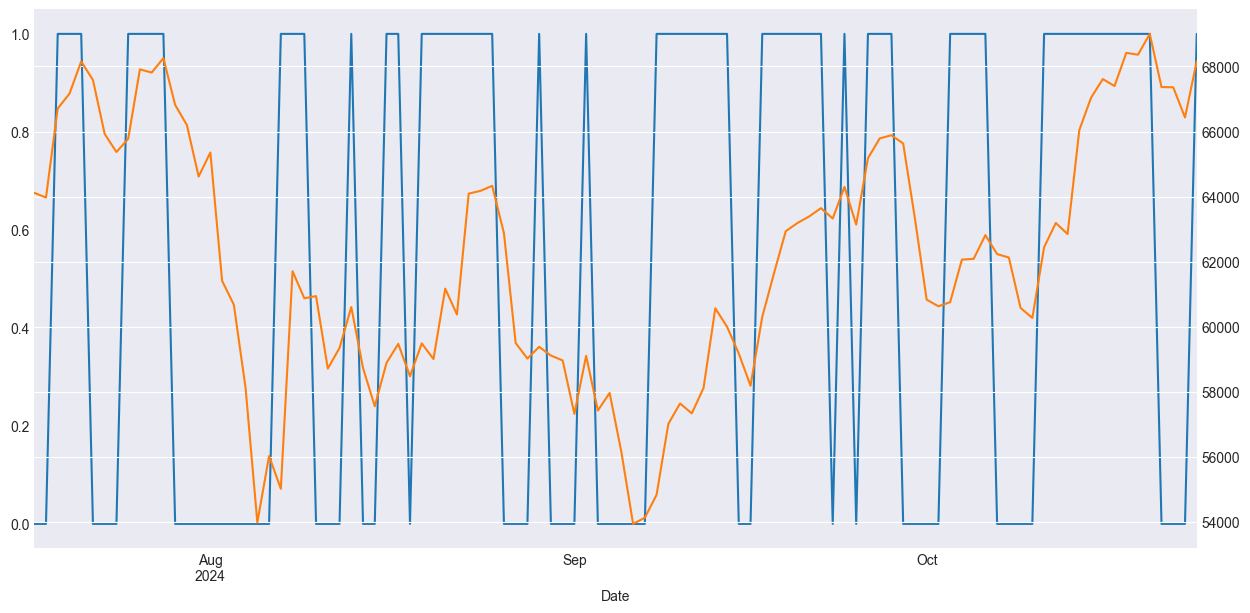

In [5]:
# Add a new column 'signal' to the 'df' DataFrame.
# Set 'signal' to 1 if 'Close' is greater than 'sma', else set it to 0.
df['signal'] = np.where(df['Close'] > df['sma'], 1, 0)

# Plot the last 100 rows of the 'signal' column with a figure size of 15x7.
df['signal'][-100:].plot(figsize=(15, 7))

# Plot the 'Close' column on the secondary y-axis for the last 100 rows of data.
df['Close'][-100:].plot(secondary_y=True)

# Analyse Strategy Returns

In [6]:
# Calculate 'buy_hold' by cumulatively multiplying the daily percent change in 'Close' with 1.0 and adding 1.0.
df['buy_hold'] = (df['Close'].pct_change() + 1.0).cumprod()

# Print the buy and hold returns
print(f"The buy and hold returns are {df['buy_hold'][-1]:.2f}")

The buy and hold returns are 68.28


The cumulative strategy returns are 129.94


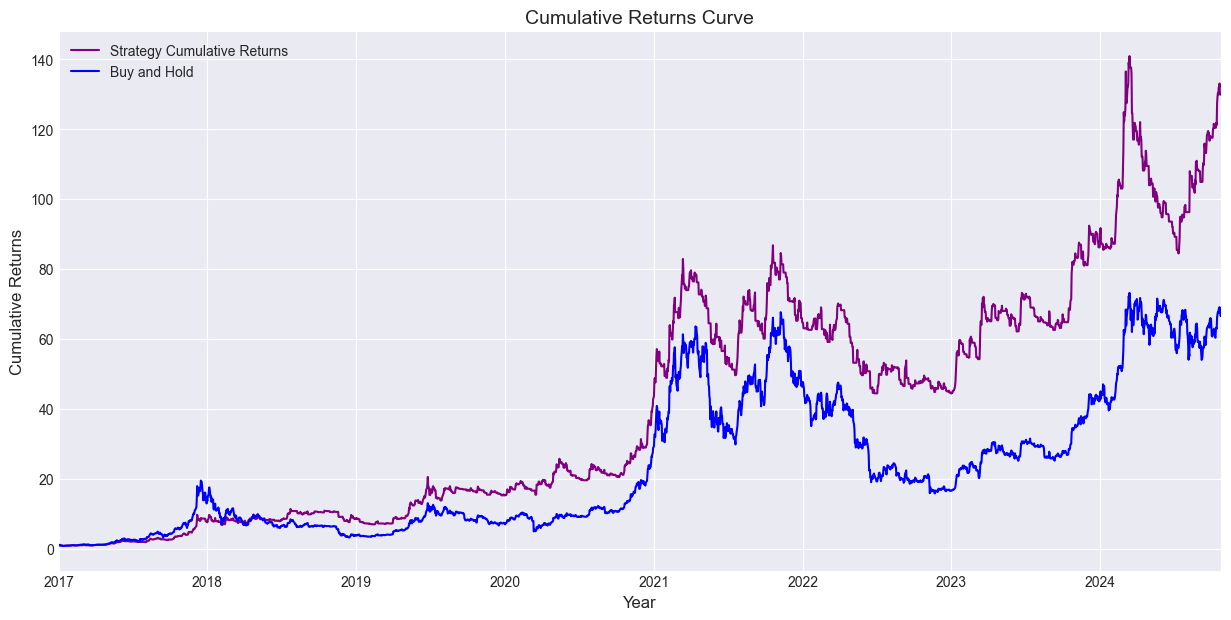

In [7]:
# Calculate 'strategy_returns' by multiplying the previous day's 'signal' with the daily percent change in 'Close'.
df['strategy_returns'] = df['signal'].shift(1) * df['Close'].pct_change()

# Calculate cumulative strategy returns
df['Cumulative_Returns'] = (df['strategy_returns'] + 1.0).cumprod()

# Print the strategy cumulative returns
print(f"The cumulative strategy returns are {df['Cumulative_Returns'][-1]:.2f}")

# Plot the cumulative strategy returns
(df['Cumulative_Returns'].plot(figsize=(15, 7), color='purple', label='Strategy Cumulative Returns'))
(df['buy_hold'].plot(figsize=(15, 7), color='blue', label='Buy and Hold'))

# Set the title and axis labels
plt.title('Cumulative Returns Curve', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.legend()

# Display the chart
plt.show()

## Moving Average Crossover

<AxesSubplot:label='ff98b451-b304-45b8-b807-05c11aaf9247'>

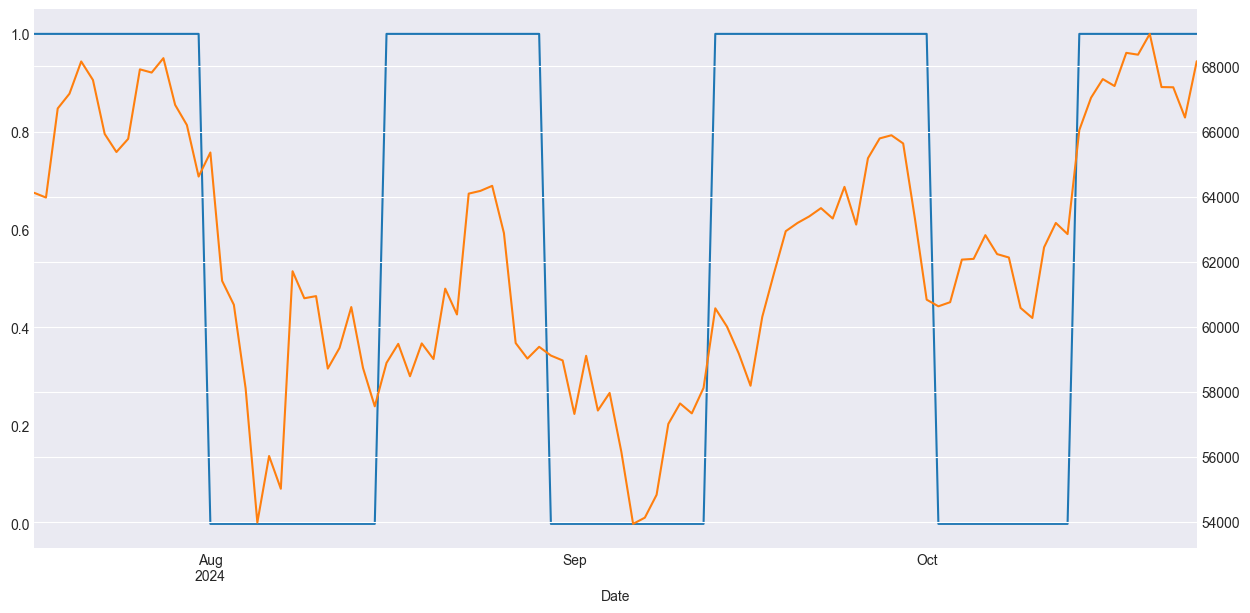

In [8]:
df['ma']=df['Close'].rolling(5).mean()
df['lma']=df['Close'].rolling(15).mean()
df['crossover_signal']=np.where(df['ma']>df['lma'],1,0)
df['crossover_signal'][-100:].plot(figsize=(15,7))
df['Close'][-100:].plot(secondary_y = True)

## Analyse MA Crossover Strategy Returns

The cumulative strategy returns are 49.15


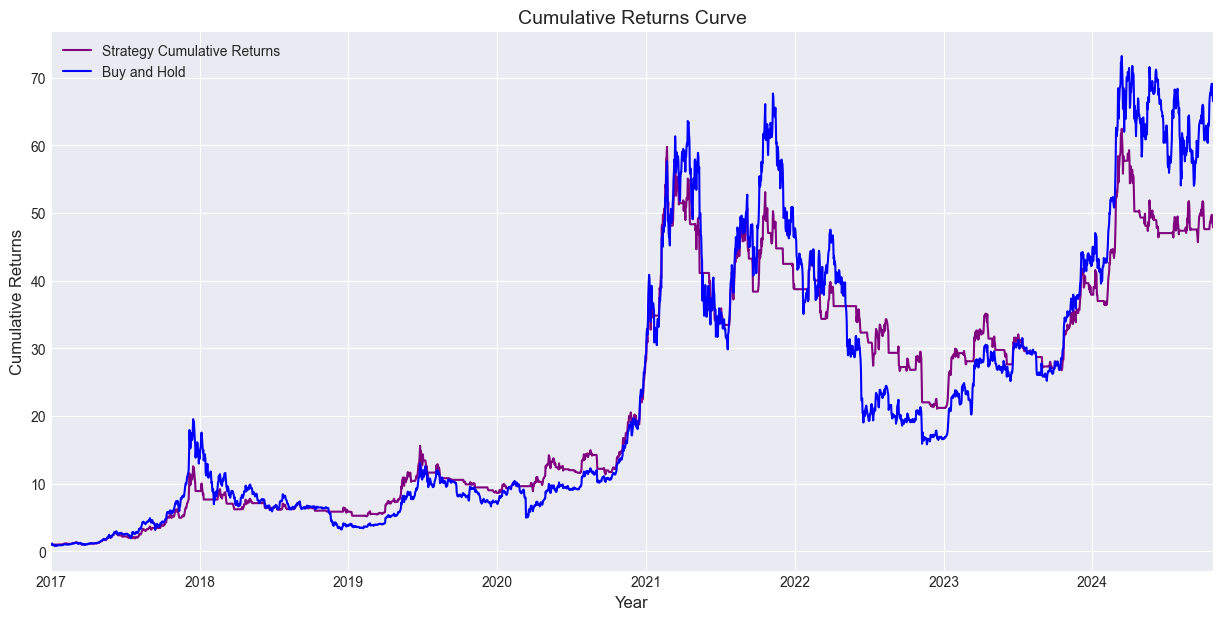

In [9]:
df['ma_strategy_returns'] = df['crossover_signal'].shift(1) * df['Close'].pct_change()

# Calculate cumulative strategy returns
df['Cumulative_Returns'] = (df['ma_strategy_returns'] + 1.0).cumprod()

# Print the strategy cumulative returns
print(f"The cumulative strategy returns are {df['Cumulative_Returns'][-1]:.2f}")

# Plot the cumulative strategy and buy and hold returns
(df['Cumulative_Returns'].plot(figsize=(15, 7), color='purple', label='Strategy Cumulative Returns'))
(df['buy_hold'].plot(figsize=(15, 7), color='blue', label='Buy and Hold'))

# Set the title and axis labels
plt.title('Cumulative Returns Curve', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.legend()

# Display the chart
plt.show()

## Conclusion

Not all strategies work out. You should always backtest a trading strategy against historical data to analyse its performance.

In [10]:
import talib as ta

In [11]:
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

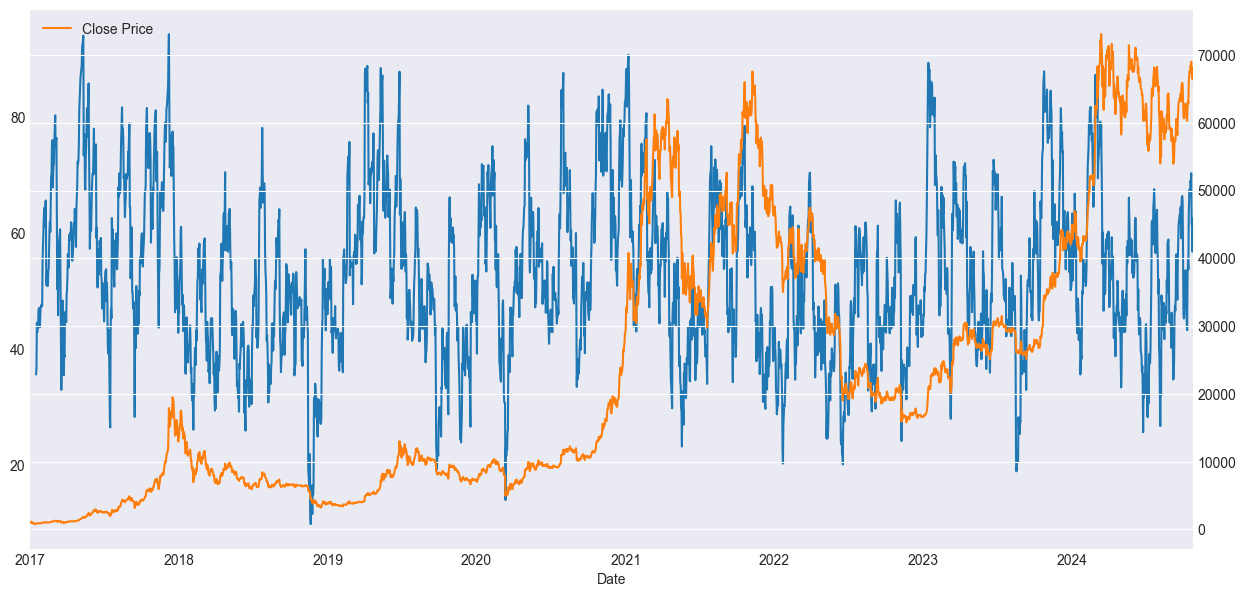

In [17]:
df['RSI'].plot(figsize=(15,7), label='RSI')
df['Close'][].plot(label='Close Price', secondary_y = True)
plt.legend()

# Display the chart
plt.show()

<AxesSubplot:label='b8612e12-29ed-45f5-848d-95708b32ab3b'>

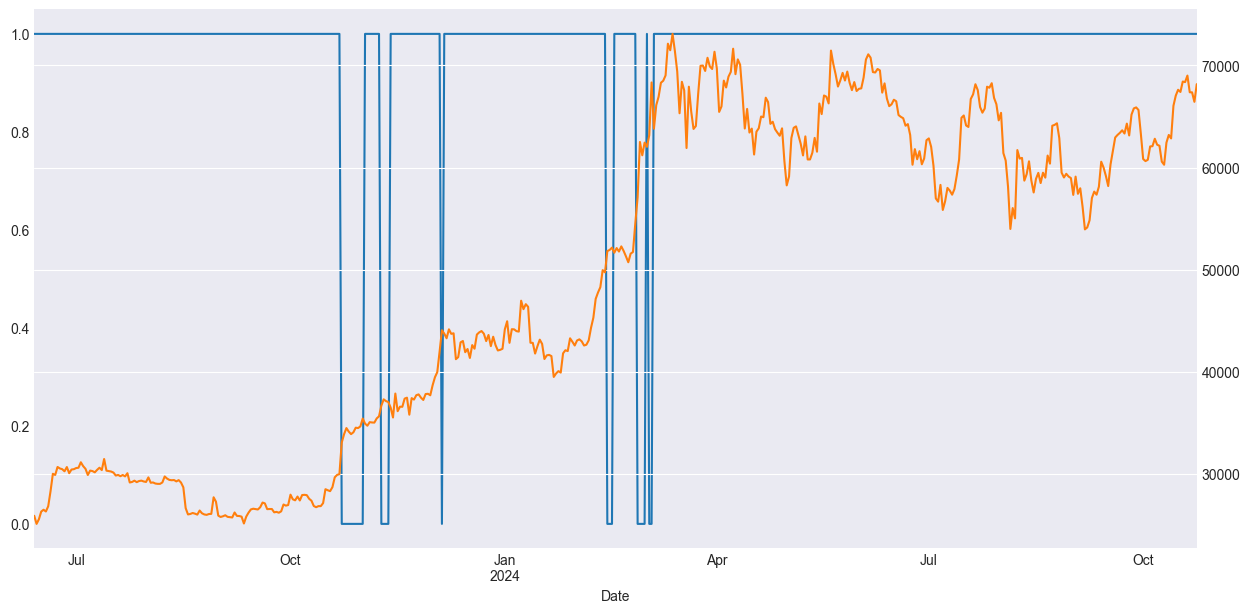

In [13]:
df['rsi_signal']=1
df['rsi_signal'] = np.where(df['RSI'] > 80, 0, 1)
df['rsi_signal'] = np.where(df['RSI'] < 40, 1,df['rsi_signal'])


df['rsi_signal'][-500:].plot(figsize=(15, 7))

df['Close'][-500:].plot(secondary_y=True)

The cumulative strategy returns are 24.19


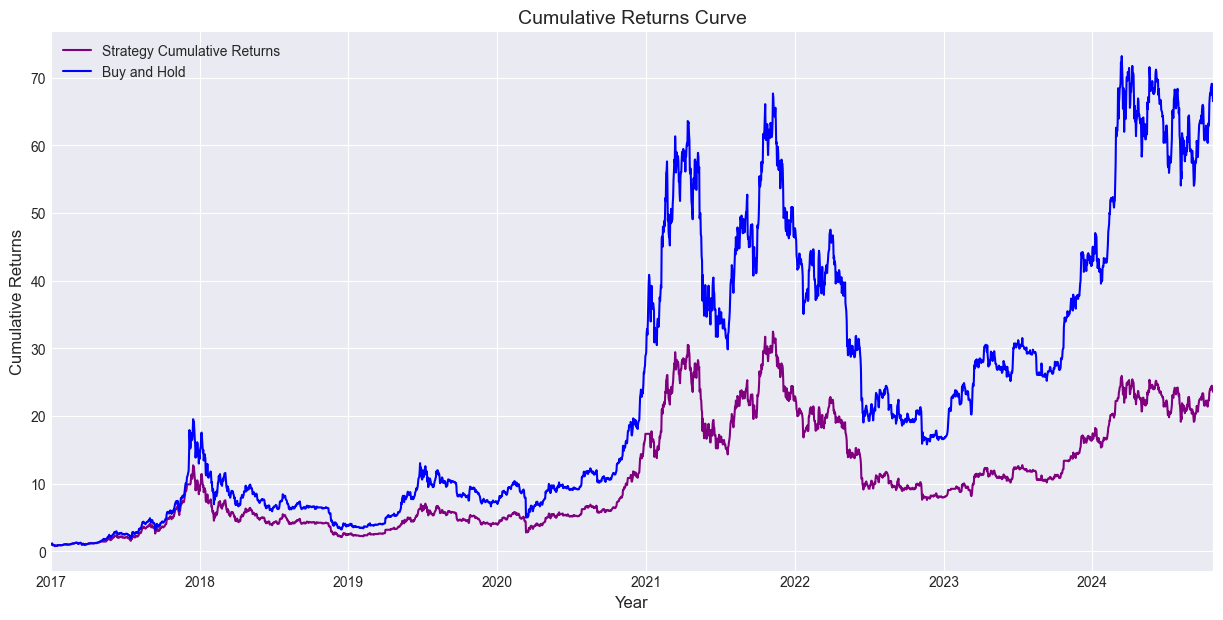

In [14]:
df['RSI_strategy_returns'] = df['rsi_signal'].shift(1) * df['Close'].pct_change()

# Calculate cumulative strategy returns
df['Cumulative_Returns'] = (df['RSI_strategy_returns'] + 1.0).cumprod()

# Print the strategy cumulative returns
print(f"The cumulative strategy returns are {df['Cumulative_Returns'][-1]:.2f}")

# Plot the cumulative strategy and buy and hold returns
(df['Cumulative_Returns'].plot(figsize=(15, 7), color='purple', label='Strategy Cumulative Returns'))
(df['buy_hold'].plot(figsize=(15, 7), color='blue', label='Buy and Hold'))

# Set the title and axis labels
plt.title('Cumulative Returns Curve', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.legend()

# Display the chart
plt.show()